In [ ]:
pip install control

     |████████████████████████████████| 357 kB 19.3 MB/s eta 0:00:01
  Created wheel for control: filename=control-0.9.1-py2.py3-none-any.whl size=364703 sha256=70bd2672d40d80f842675b5b6b3e982fb39cd1c27b2393df60f47f09dc2b5e97
  Stored in directory: /root/.cache/pip/wheels/b1/50/22/8005107713828997d1af664fbd629c7f935a1b87fc2f4ba6c1
Successfully built control


# Exemplo

O sistema de controle de atitude de um veículo espacial é representado pela composição em realimentação unitária, cujo ganho direto é composto pela função de transferência de um controlador $G(s) = k \frac{10^9(s+1)}{s+8}$ e a função de transferência do processo $H(s) = \frac{1}{Js^2}$, em que $J$ é o momento de inércia do veículo espacial e seu valor nominal é $J = 10^9$ kg m$^2$. Determine a posição dos polos de malha fechada para $k=0, 1, 2, 3, \ldots, 100$.

Zeros da malha aberta: [-1.]
Polos da malha aberta: [-8.  0.  0.]
Polos da malha fechada para k =  0.0 : [-8.  0.  0.]
Polos da malha fechada para k =  10.0 : [-6.73580053+0.j         -0.63209974+1.04165947j -0.63209974-1.04165947j]
Polos da malha fechada para k =  20.0 : [-4.59431302+0.j         -1.70284349+1.20562515j -1.70284349-1.20562515j]
Polos da malha fechada para k =  30.0 : [-3.26458807+3.1207686j -3.26458807-3.1207686j -1.47082386+0.j       ]
Polos da malha fechada para k =  40.0 : [-3.36388171+4.48608884j -3.36388171-4.48608884j -1.27223658+0.j        ]
Polos da malha fechada para k =  50.0 : [-3.40295908+5.5039119j -3.40295908-5.5039119j -1.19408184+0.j       ]
Polos da malha fechada para k =  60.0 : [-3.42435115+6.35522808j -3.42435115-6.35522808j -1.15129769+0.j        ]
Polos da malha fechada para k =  70.0 : [-3.43793752+7.10290383j -3.43793752-7.10290383j -1.12412496+0.j        ]
Polos da malha fechada para k =  80.0 : [-3.44735627+7.77785931j -3.44735627-7.77785931j 

/usr/local/lib/python3.7/dist-packages/control/grid.py:152: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = plt.axes()


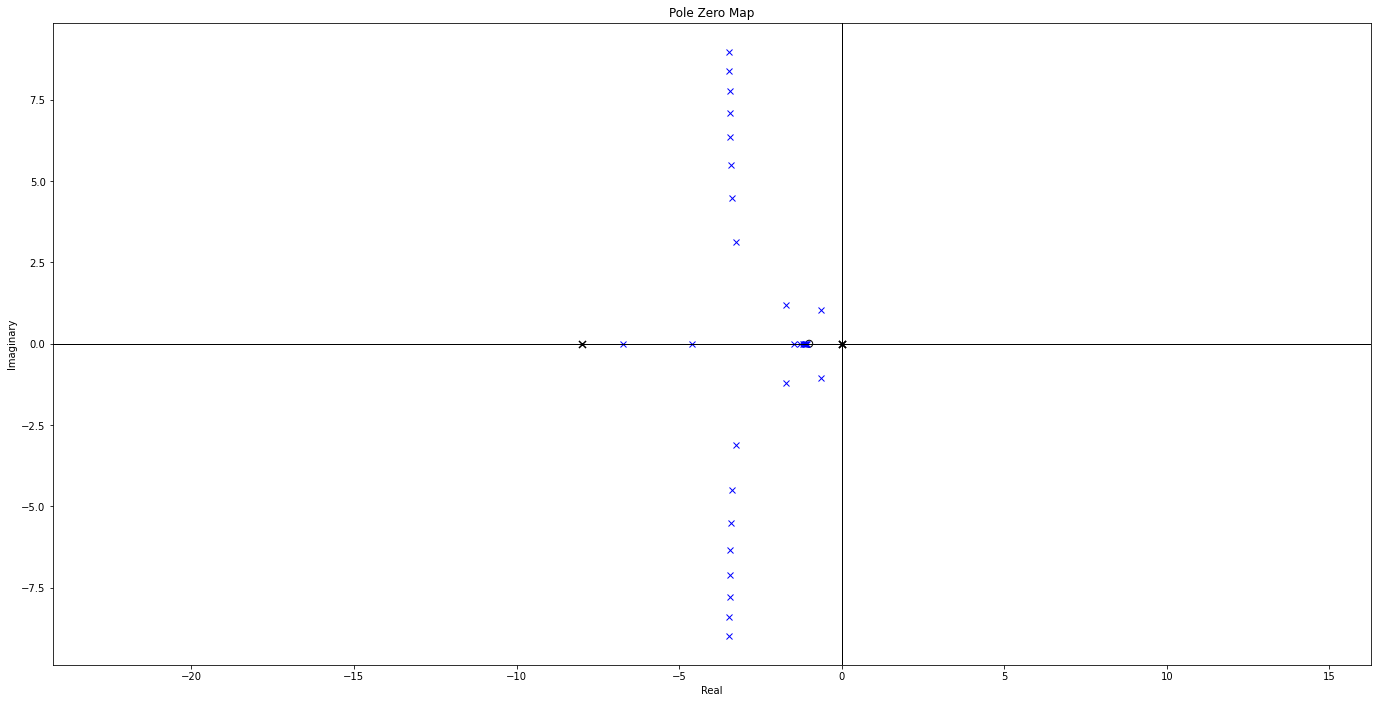

In [ ]:
#Composição por realimentação negativa de sistemas
from control.matlab import *
import numpy as np
import matplotlib.pyplot as plt
cm = 1/2.54  # centimeters in inches

s = tf('s')

J=1.0 * 10.0**9
G = J * (s + 1.0)/(s + 8.0)
H = 1/(J*s**2)
H_ramo_realimentacao=tf (1.0 ,1.0)
H_ramo_direto = series(G,H)
FTMA = series(H_ramo_direto,H_ramo_realimentacao)
print('Zeros da malha aberta:', zero(FTMA)) 
print('Polos da malha aberta:', pole(FTMA)) 


t = np.linspace(0, 100, num =500)
u = 10*np.ones(t.shape)

arrayk = np.linspace(0, 100, num =11, endpoint=True)
#arrayk = np.linspace(0, 100, num =101, endpoint=True)

plt.figure(1,figsize=(60*cm, 30*cm))

for j in range(0,len(arrayk)):
  if j == 0:
    k = arrayk[j]
    print('Polos da malha fechada para k = ', k, ':', np.roots([1.0, 8.0, 0.0, 0.0]))
  else:
    k = arrayk[j]
    G = k * J * (s + 1.0)/(s + 8.0)
    H_ramo_direto=series(G,H)
    #print('Função de transferência do ramo direto:', H_ramo_direto)
    FTMF=feedback(H_ramo_direto,H_ramo_realimentacao, sign=-1)
    #print('Função de transferência de malha fechada:', FTMF)
    print('Polos da malha fechada para k = ', k, ':', pole(FTMF))  
    polosMF = FTMF.pole()
    plt.plot(np.real(polosMF), np.imag(polosMF),"xb")
    #pzmap(FTMF)
    #y1,t1,x1 = lsim(FTMF, u, t)

pzmap(H_ramo_direto)
plt.show()

Função rlocus: gráfico do lugar das raízes

<Figure size 425.197x425.197 with 0 Axes>

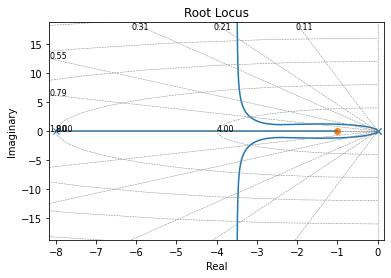

In [ ]:
import matplotlib.pyplot as plt
from control.matlab import *

cm = 1/2.54  # centimeters in inches

s = tf('s')
J=1.0 * 10.0**9
G = J * (s + 1.0)/(s + 8.0)
H = 1/(J*s**2)

L = series(G,H)

plt.figure(1,figsize=(15*cm, 15*cm))
fig, ax = plt.subplots(1, 1)
#ax.set_aspect(aspect='equal')
rlocus(L)
plt.show()

# Atividades

Por meio da função rlocus, apresente o lugar das raízes das funções de transferência de malha aberta $\frac{K}{s+1}$, $\frac{K(s+1)}{s+2}$, $\frac{K(s+2)}{s+1}$, $\frac{K}{s(s+1)}$, $\frac{K}{s(s+1)(s+2)}$, $\frac{K}{s(s+1)(s+2)(s+3)}$, $\frac{K}{s(s^2 + s +4)}$. Quais são as suas conclusões considerando os polos e zeros de cada função de transferência e seu respectivo lugar das raízes?


  1
-----
s + 1



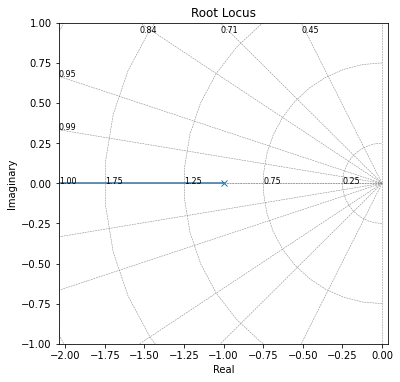


s + 1
-----
s + 2



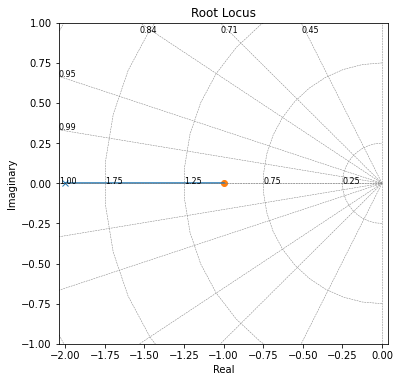


s + 2
-----
s + 1



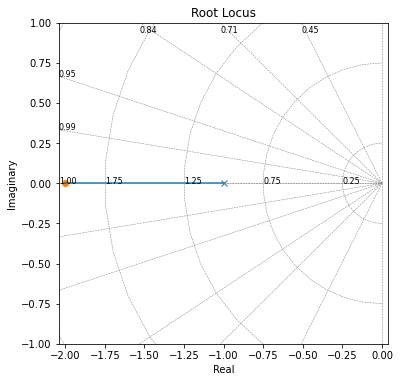


   1
-------
s^2 + s



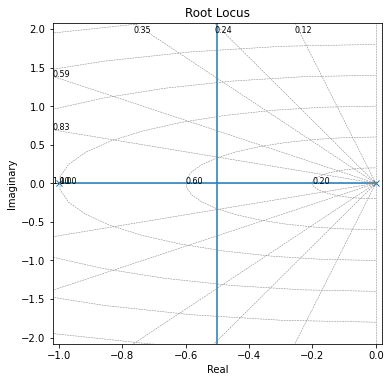


        1
-----------------
s^3 + 3 s^2 + 2 s



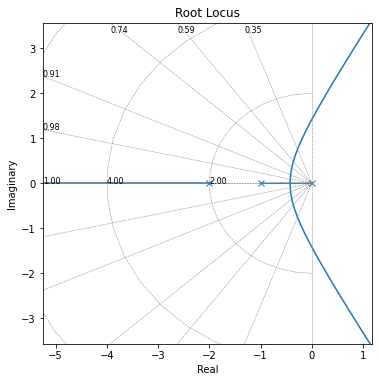


            1
--------------------------
s^4 + 6 s^3 + 11 s^2 + 6 s



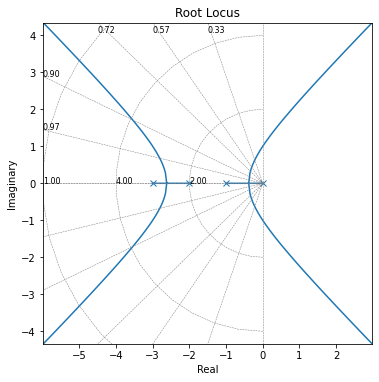


       1
---------------
s^3 + s^2 + 4 s



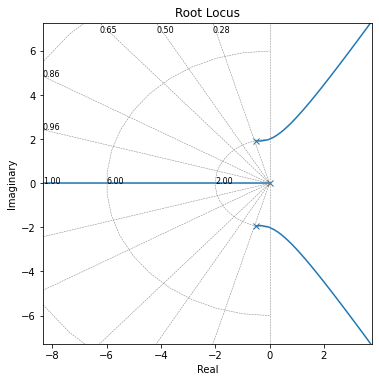

In [ ]:
#Resposta

import matplotlib.pyplot as plt
from control.matlab import *
cm = 1/2.54  # centimeters in inches

s = tf('s')

H1 = 1/(s + 1)
H2 = (s + 1)/(s + 2)                 # = 1/H1*(s+2)
H3 = (s + 2)/(s + 1)                 # = 1/H2
H4 = 1/(s*(s + 1))                   # = 1/s*H1
H5 = 1/(s*(s + 1)*(s + 2))           # = H4/(s + 2)
H6 = 1/(s*(s + 1)*(s + 2)*(s + 3))   # = H3/(s + 3)
H7 = 1/(s*(s**2 + s + 4))            

print(H1)
plt.figure(1,figsize=(15*cm, 15*cm))
rlocus(H1)
plt.show()

print(H2)
plt.figure(1,figsize=(15*cm, 15*cm))
rlocus(H2)
plt.show()

print(H3)
plt.figure(1,figsize=(15*cm, 15*cm))
rlocus(H3)
plt.show()

print(H4)
plt.figure(1,figsize=(15*cm, 15*cm))
rlocus(H4)
plt.show()

print(H5)
plt.figure(1,figsize=(15*cm, 15*cm))
rlocus(H5)
plt.show()

print(H6)
plt.figure(1,figsize=(15*cm, 15*cm))
rlocus(H6)
plt.show()

print(H7)
plt.figure(1,figsize=(15*cm, 15*cm))
rlocus(H7)
plt.show()


Considere o sistema de controle proposto no slide 52 do documento AcoesBasicasControle.pdf composto por um controlador PI, em que $K_i = 1$ e$K_p = 20$, e um processo com função de transferência $\frac{K}{s+a}$ em que $K=0.001$, e $a$ não é conhecido. Apresente o lugar das raízes desse sistema de controle para $a \in \left[0, \infty \right)$.

# Exemplos

Número complexo na forma retangular

In [ ]:
s = -3 + 4j

print ('s =', s)

s = (-3+4j)


Número complexo na forma polar

In [ ]:
import cmath

s = 1 * cmath.exp(1j * cmath.pi / 4)

print ('Número complexo módulo = 1 e argumento = pi/4 rad.')
print ('\n (Forma retangular) s =', s)

Número complexo módulo = 1 e argumento = pi/4 rad.

 (Forma retangular) s = (0.7071067811865476+0.7071067811865475j)


Conversões entre as formas retangular e polar

In [ ]:
import cmath
import math
import numpy as np

s = 1 + 1j

print (' Forma retangular de s =', s)
print ('\n Conjungado de s =', np.conj(s))
print ('\n Re(s) =', s.real)
print ('\n Im(s) =', s.imag)
print ('\n Forma polar de s =', cmath.polar(s))  # Conversão de s para forma polar.
print ('\n |s| =', abs(s))
print ('\n arg(s) =', cmath.phase(s), 'rad')
print ('\n arg(s) =', math.degrees(cmath.phase(s)), '˚')

 Forma retangular de s = (1+1j)

 Conjungado de s = (1-1j)

 Re(s) = 1.0

 Im(s) = 1.0

 Forma polar de s = (1.4142135623730951, 0.7853981633974483)

 |s| = 1.4142135623730951

 arg(s) = 0.7853981633974483 rad

 arg(s) = 45.0 ˚


Operações

In [ ]:
import cmath

s1 = 2 - 5j
s2 = 3 - 7j

print (s1)
print (s2)
print ('s1 + s2 = ', s1 + s2) # Soma de números complexos.
print ('s1 - s2 = ', s1 - s2)  # Subtração de números complexos.
print ('s1 * s2 = ', s1 * s2)  # Multiplicação de números complexos.
print ('s1 / s2 = ', s1 / s2)  # Divisão de números complexos.
print ('s1**2 = ', s1**2)  # Potenciação de números complexos.
print ('sqrt(s1) = ', cmath.sqrt(s1))  # Raiz quadrada de número complexo.


(2-5j)
(3-7j)
s1 + s2 =  (5-12j)
s1 - s2 =  (-1+2j)
s1 * s2 =  (-29-29j)
s1 / s2 =  (0.706896551724138-0.01724137931034482j)
s1**2 =  (-21-20j)
sqrt(s1) =  (1.921609326467597-1.3009928530039094j)


# Atividades

Apresente o lugar das raízes do processo cuja função de transferência é $H(s)=\frac{3}{s^2+1.2s+4}$. Deseja-se projetar um controlador com função de transferência $G(s)$ tal que o lugar das raízes da função de transferência de malha aberta $L(s)=G(s)H(s)$ passe por $s_0 = −0.4110+2.7090j$. Realize os cálculos apresentados no slide 92 do documento LugasdasRaizes.pdf e determine os ganhos do controlador PI. Apresente o lugar das raízes de $L(s)$ e a resposta da malha fechada ao degrau unitário, como apresentado nos slides 93 e 94.